In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:/Users/Subhashish/Downloads/single_genre_artists.csv")
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [3]:
print(df.columns)

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')


In [4]:
df.columns = df.columns.str.strip()

In [6]:
df_clean = df.copy()

In [7]:
features = [
    "danceability", "energy", "loudness",
    "speechiness", "acousticness",
    "instrumentalness", "liveness",
    "valence", "tempo", "duration_ms"
]

X = df_clean[features]
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

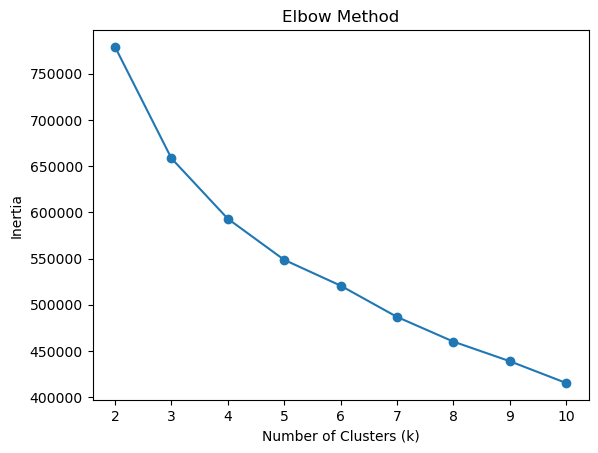

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.203
k=3, silhouette score=0.242
k=4, silhouette score=0.231
k=5, silhouette score=0.186
k=6, silhouette score=0.159


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clean["cluster"] = kmeans.fit_predict(X_scaled)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_clean["pca1"] = X_pca[:, 0]
df_clean["pca2"] = X_pca[:, 1]

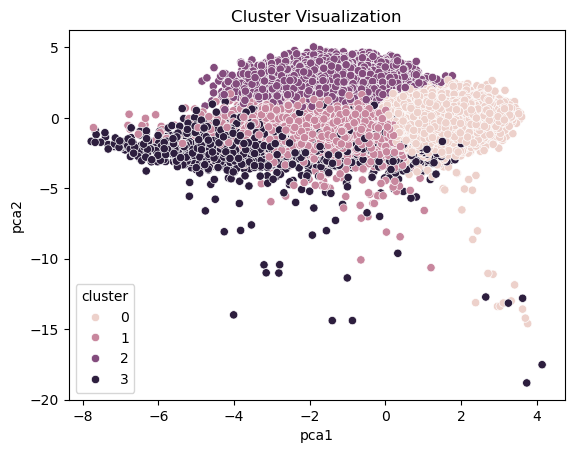

In [13]:
import seaborn as sns

sns.scatterplot(data=df_clean, x="pca1", y="pca2", hue="cluster")
plt.title("Cluster Visualization")
plt.show()

In [14]:
from sklearn.metrics import davies_bouldin_score

print("Silhouette Score:", silhouette_score(X_scaled, df_clean["cluster"]))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, df_clean["cluster"]))

Silhouette Score: 0.23100828865526338
Davies-Bouldin Index: 1.530181350084105


In [15]:
df_clean.to_csv("clustered_songs.csv",index=False)
print("file saved successfully")

file saved successfully


In [16]:
df_clean["cluster"].value_counts()

cluster
0    46346
1    29215
2    12411
3     7865
Name: count, dtype: int64

In [17]:
cluster_profile = df_clean.groupby("cluster")[features].mean()
print(cluster_profile)

         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.634832  0.707777  -7.414974     0.077059      0.242020   
1            0.505153  0.342079 -12.115724     0.060980      0.698858   
2            0.664336  0.466457 -13.386101     0.834431      0.585644   
3            0.485342  0.415780 -13.954082     0.059931      0.646648   

         instrumentalness  liveness   valence       tempo    duration_ms  
cluster                                                                   
0                0.021055  0.201161  0.685771  125.276767  224537.073555  
1                0.017434  0.183032  0.426972  113.447308  224905.570495  
2                0.000974  0.435270  0.583524  100.333864   96923.060511  
3                0.810590  0.188537  0.449905  114.301937  231955.267387  


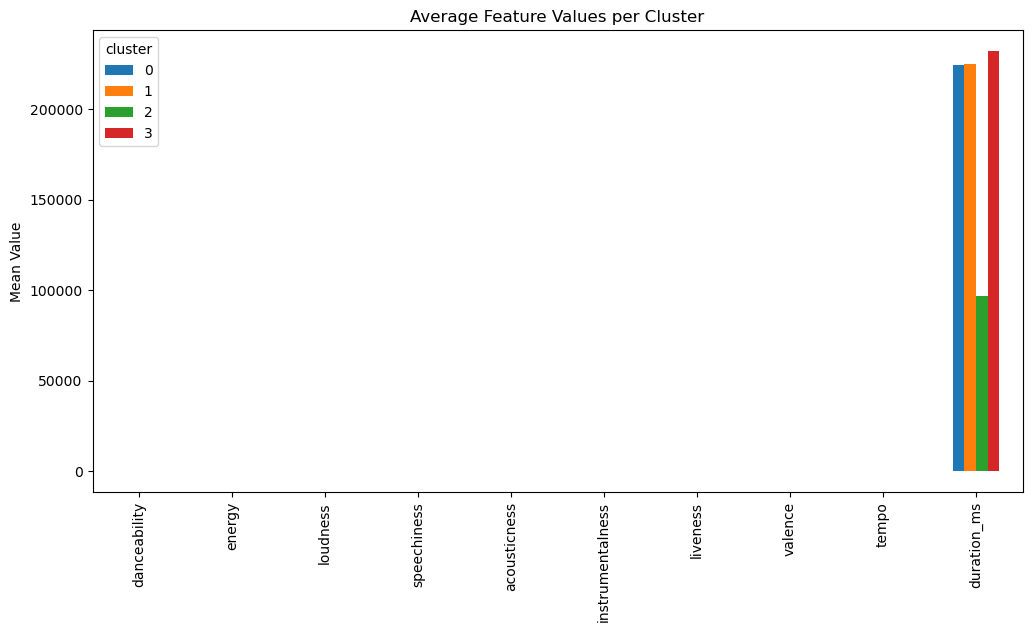

In [18]:
cluster_profile.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Feature Values per Cluster")
plt.ylabel("Mean Value")
plt.show()

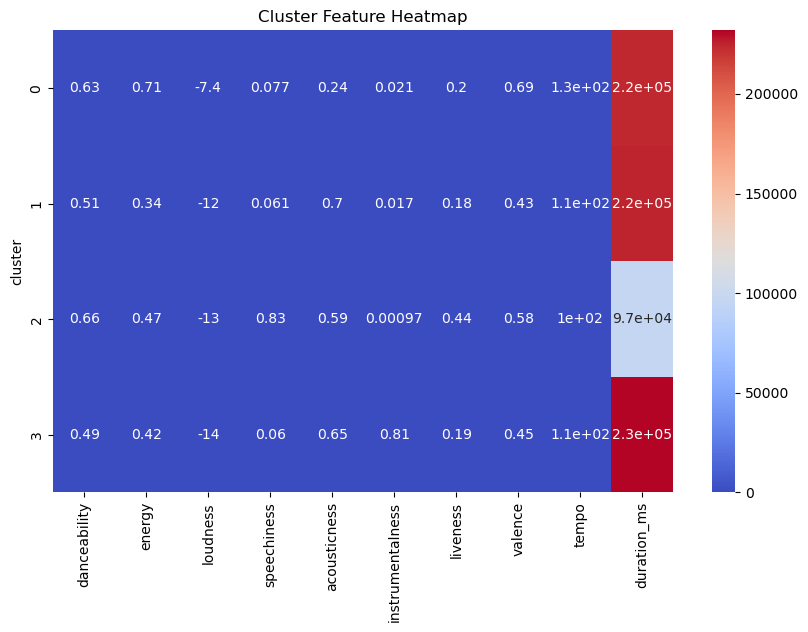

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm")
plt.title("Cluster Feature Heatmap")
plt.show()

In [20]:
cluster_profile.to_csv("cluster_profile.csv")